Ce code met au propre la recherche d'une correction adéquate pour approximer nos plaques à des appuis simples avec une meilleure précision.

Pour chaque correction, l'idée est de tester d'abord des valeurs de correction proches de la configuration. On peut aussi essayer de corriger sur le 2e, 3e mode plutôt que le premier en changeant `mode_idx` dans `corr_dim_AS`.

In [1]:
import utils as u
import numpy as np
import pickle

with open('modal_plexi.pkl', 'rb') as f:
    modal_analysis_plexi = pickle.load(f)

with open('modal_m2.pkl', 'rb') as f:
    modal_analysis_m2 = pickle.load(f)

with open('modal_m1.pkl', 'rb') as f:
    modal_analysis_m1 = pickle.load(f)

with open('modal_metal.pkl', 'rb') as f:
    modal_analysis_metal = pickle.load(f)

In [2]:
#Correction plexi
Lx_init, Ly_init, h_init = 400e-3, 260e-3, 4.51e-3
rho = 382e-3/Lx_init/Ly_init/h_init
E = 1.1e9
Lx_corr, Ly_corr, h_corr, nu_corr = u.corr_dim_AS(modal_analysis_plexi, Lx_init, Ly_init, h_init, rho, E, delta_l=10e-2, delta_h=3e-3, Nh=5, mode_idx=0, nu_cible=0.4)
print("=====================================\nFréquences propres corrigées :")
fn,_ = u.compute_AS_frequencies(Lx_corr, Ly_corr, h_corr, nu_corr, E, rho)
print(fn)
import pandas as pd
pd.DataFrame(modal_analysis_plexi).T

   Lx_init  Ly_init   h_init
0      0.4     0.26  0.00451
     Lx_corr   Ly_corr   h_corr
0   0.304082  0.315102  0.00601
1   0.308163  0.311020  0.00601
2   0.312245  0.306939  0.00601
3   0.324490  0.176327  0.00301
4   0.332653  0.290612  0.00601
5   0.336735  0.229388  0.00451
6   0.336735  0.355918  0.00751
7   0.340816  0.351837  0.00751
8   0.344898  0.347755  0.00751
9   0.348980  0.343673  0.00751
10  0.353061  0.339592  0.00751
11  0.373469  0.270204  0.00601
12  0.381633  0.319184  0.00751
13  0.385714  0.266122  0.00601
14  0.389796  0.217143  0.00451
15  0.397959  0.168163  0.00301
16  0.397959  0.262041  0.00601
17  0.406122  0.306939  0.00751
18  0.414286  0.257959  0.00601
19  0.426531  0.298776  0.00751
20  0.438776  0.294694  0.00751
21  0.451020  0.208980  0.00451
22  0.455102  0.249796  0.00601
23  0.471429  0.164082  0.00301
24  0.471429  0.286531  0.00751
25  0.483673  0.245714  0.00601
26  0.500000  0.204898  0.00451
Correction choisie : 0
Fréquences propres corr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
table,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi
freq,72.097413,142.142158,156.590101,236.72695,248.253002,294.943587,337.500398,402.021668,444.456305,480.0,496.899323,545.1771,561.253466,587.926653,652.493822,667.709243,691.521475
xi,-0.000201,-0.00021,-0.00045,-0.000356,-0.000392,-0.000153,-0.000507,-0.000319,-0.000362,-0.000275,-0.000584,-0.000823,-0.000755,-0.000377,-0.000542,-0.003401,-0.000542
ratios,1.0,1.971529,2.171924,3.283432,3.4433,4.090904,4.681172,5.57609,6.164664,6.657659,6.892055,7.561674,7.784655,8.154615,9.05017,9.261209,9.591488
xi_mod,-0.071505,-0.037908,-0.073574,-0.038456,-0.040453,-0.013247,-0.03843,-0.020312,-0.020856,-0.014682,-0.030071,-0.038635,-0.034432,-0.016427,-0.021269,-0.130382,-0.020069


In [ ]:
#Correction metal
Lx_init, Ly_init, h_init = 395e-3, 255e-3, 6.01e-3
rho = 1588e-3/Lx_init/Ly_init/h_init
E = 71e9
Lx_corr, Ly_corr, h_corr, nu_corr = u.corr_dim_AS(modal_analysis_metal, Lx_init, Ly_init, h_init, rho, E, delta_l=10e-2, delta_h=4e-3, Nh=5, mode_idx=0, nu_cible=0.4)
print("=====================================\nFréquences propres corrigées :")
fn,_ = u.compute_AS_frequencies(Lx_corr, Ly_corr, h_corr, nu_corr, E, rho)
print(fn)
import pandas as pd
pd.DataFrame(modal_analysis_metal).T

In [ ]:
#Correction m1
Lx_init, Ly_init, h_init = 400e-3, 295e-3, 2.95e-3
rho = 236e-3/Lx_init/Ly_init/h_init
E = 2.7e9
Lx_corr, Ly_corr, h_corr, nu_corr = u.corr_dim_AS(modal_analysis_m1, Lx_init, Ly_init, h_init, rho, E, delta_l=10e-2, delta_h=2e-3, Nh=5, mode_idx=0, nu_cible=0.4)
print("=====================================\nFréquences propres corrigées :")
fn,_ = u.compute_AS_frequencies(Lx_corr, Ly_corr, h_corr, nu_corr, E, rho)
print(fn)
import pandas as pd
pd.DataFrame(modal_analysis_m1).T

In [ ]:
#Correction m2
Lx_init, Ly_init, h_init = 400e-3, 295e-3, 6.04e-3
rho = 507e-3/Lx_init/Ly_init/h_init
E = 2.7e9
Lx_corr, Ly_corr, h_corr, nu_corr = u.corr_dim_AS(modal_analysis_m2, Lx_init, Ly_init, h_init, rho, E, delta_l=10e-2, delta_h=1e-3, Nh=3, mode_idx=0, nu_cible=0.4)
print("=====================================\nFréquences propres corrigées :")
fn,_ = u.compute_AS_frequencies(Lx_corr, Ly_corr, h_corr, nu_corr, E, rho)
print(fn)
import pandas as pd
pd.DataFrame(modal_analysis_m2).T

In [ ]:
#Meilleure correction : 21
Lx_corr, Ly_corr, h_corr

# Avec optimisation

In [51]:
#Correction plexi
Lx_init, Ly_init, h_init = 400e-3, 260e-3, 4.51e-3
rho = 382e-3/Lx_init/Ly_init/h_init
E = 1.1e9
Lx_corr, Ly_corr, h_corr, nu_corr = u.corr_dim_AS_optim(modal_analysis_plexi, Lx_init, Ly_init, h_init, rho, E, delta_l=10e-2, delta_h=3e-3, Nh=5, mode_idx=0, nu_cible=0.4, optim_tol=20, Nmatch=5)
print("Correction :", Lx_init, Ly_init, h_init, "=>", Lx_corr, Ly_corr, h_corr)
print("==========================================================\nFréquences propres initiales :")
fn_init,_ = u.compute_AS_frequencies(Lx_init, Ly_init, h_init, nu_corr, E, rho)
print(fn_init)
print("==========================================================\nFréquences propres corrigées :")
fn,_ = u.compute_AS_frequencies(Lx_corr, Ly_corr, h_corr, nu_corr, E, rho)
print(fn)
import pandas as pd
pd.DataFrame(modal_analysis_plexi).T

Correction : 0.4 0.26 0.00451 => 0.3979591836734694 0.2620408163265306 0.006010000000000001
Fréquences propres initiales :
[ 54.53129718 103.12069554 169.53579034 184.10302615 218.12518871
 299.10751931 361.20994562 409.79934399 490.78167459]
Fréquences propres corrigées :
[ 72.09741278 137.51316982 222.97389408 246.53943156 288.38965112
 397.41591286 474.43469624 539.85045328 648.87671502]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
table,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi
freq,72.097413,142.142158,156.590101,236.72695,248.253002,294.943587,337.500398,402.021668,444.456305,480.0,496.899323,545.1771,561.253466,587.926653,652.493822,667.709243,691.521475
xi,-0.000201,-0.00021,-0.00045,-0.000356,-0.000392,-0.000153,-0.000507,-0.000319,-0.000362,-0.000275,-0.000584,-0.000823,-0.000755,-0.000377,-0.000542,-0.003401,-0.000542
ratios,1.0,1.971529,2.171924,3.283432,3.4433,4.090904,4.681172,5.57609,6.164664,6.657659,6.892055,7.561674,7.784655,8.154615,9.05017,9.261209,9.591488
xi_mod,-0.071505,-0.037908,-0.073574,-0.038456,-0.040453,-0.013247,-0.03843,-0.020312,-0.020856,-0.014682,-0.030071,-0.038635,-0.034432,-0.016427,-0.021269,-0.130382,-0.020069


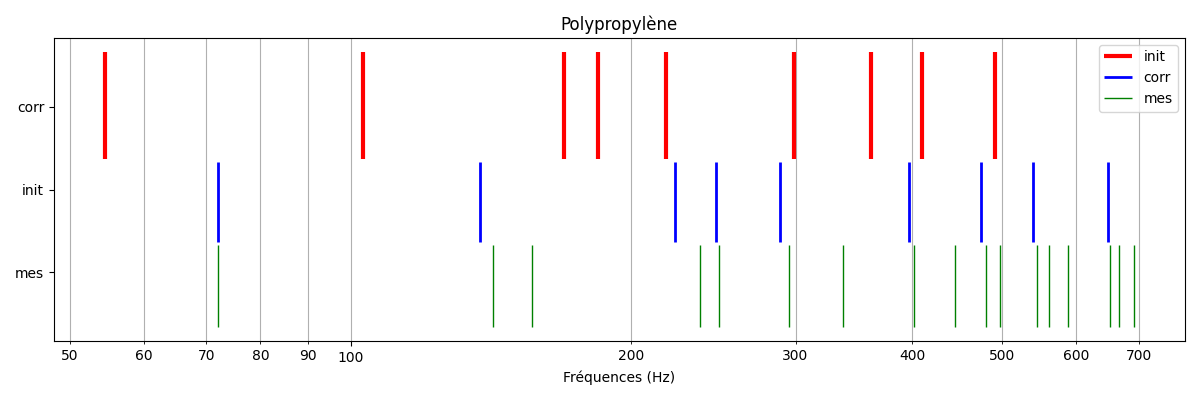

In [53]:
import matplotlib.pyplot as plt
%matplotlib widget
plt.rcParams["figure.figsize"] = (12,4)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.vlines(fn_init, 0.61,1, label="init", ls="-", alpha=1, color="r", lw=3)
ax1.vlines(fn, 0.31,0.6, label="corr", ls="-", alpha=1, color="b", lw=2)
ax1.vlines(modal_analysis_plexi[ "freq"], 0,0.3,label="mes", ls="-", alpha=1, color="g", lw=1)
ax1.set_xscale('log')
ax1.grid(which="both", axis="x")
ax1.set_yticks([0.2,0.5,0.8])
ax1.set_yticklabels(["mes","init","corr"])
ax1.legend()
ax1.set_xlabel("Fréquences (Hz)")
ax1.set_ylabel("")
ax1.set_title(r"Polypropylène")
ax1.set_xlim()
ax1.set_ylim()
import matplotlib.ticker as mticker
ax1.xaxis.set_minor_formatter(mticker.ScalarFormatter())
ax1.xaxis.set_major_formatter(mticker.ScalarFormatter())

fig.tight_layout()

plt.show()

In [63]:
plexi_corrige = {
    "xi_mod" : np.array([-0.071505, -0.037908, -0.038456, -0.040453, -0.013247, -0.020312, -0.014682, -0.038635, -0.021269]),
    "Lx_corr" : Lx_corr,
    "Ly_corr" : Ly_corr,
    "h_corr" : h_corr,
    "Enu" : E/(1-nu_corr**2),
}
print(plexi_corrige)

{'xi_mod': array([-0.071505, -0.037908, -0.038456, -0.040453, -0.013247, -0.020312,
       -0.014682, -0.038635, -0.021269]), 'Lx_corr': 0.3979591836734694, 'Ly_corr': 0.2620408163265306, 'h_corr': 0.006010000000000001, 'Enu': 1307742955.0439968}


In [71]:
#Correction metal
Lx_init, Ly_init, h_init = 395e-3, 255e-3, 6.01e-3
rho = 1588e-3/Lx_init/Ly_init/h_init
E = 70e9
Lx_corr, Ly_corr, h_corr, nu_corr = u.corr_dim_AS_optim(modal_analysis_metal, Lx_init, Ly_init, h_init, rho, E, delta_l=10e-2, delta_h=3e-3, Nh=10, mode_idx=0, nu_cible=0.4, Nmatch=4, optim_tol=20)
print("Correction :", Lx_init, Ly_init, h_init, "=>", Lx_corr, Ly_corr, h_corr)
print("==========================\nFréquences propres corrigées :")
fn,_ = u.compute_AS_frequencies(Lx_corr, Ly_corr, h_corr, nu_corr, E, rho)
print(fn)
import pandas as pd
pd.DataFrame(modal_analysis_metal).T

Correction : 0.395 0.255 0.00601 => 0.4786734693877551 0.3305102040816326 0.00501
Fréquences propres corrigées :
[ 173.          340.55265055  524.44734945  619.80706814  692.
  971.25441758 1110.19293186 1277.74558242 1557.        ]


,0,1,2,3,4,5,6,7,8,9,10,11,12
table,Metal,Metal,Metal,Metal,Metal,Metal,Metal,Metal,Metal,Metal,Metal,Metal,Metal
freq,173,345,378,506,606,711,776,842,889,967,1049,1097,1184
xi,-0.000429,-0.000814,-0.000775,-0.000819,-0.000982,-0.0006,-0.001486,-0.001408,-0.001427,-0.001286,-0.00196,-0.001712,-0.001862
ratios,1.0,1.99422,2.184971,2.924855,3.50289,4.109827,4.485549,4.867052,5.138728,5.589595,6.063584,6.34104,6.843931
xi_mod,-0.063436,-0.060403,-0.052469,-0.041436,-0.041484,-0.021603,-0.049023,-0.042809,-0.041092,-0.034045,-0.047832,-0.039952,-0.040259


In [72]:
metal_corrige = {
    "xi_mod" : np.array([-0.063436, -0.060403, -0.041436, -0.041484, -0.021603, -0.034045, -0.047832, -0.039952, -0.040259]),
    "Lx_corr" : Lx_corr,
    "Ly_corr" : Ly_corr,
    "h_corr" : h_corr,
    "Enu" : E/(1-nu_corr**2),
}
print(metal_corrige)

{'xi_mod': array([-0.063436, -0.060403, -0.041436, -0.041484, -0.021603, -0.034045,
       -0.047832, -0.039952, -0.040259]), 'Lx_corr': 0.4786734693877551, 'Ly_corr': 0.3305102040816326, 'h_corr': 0.00501, 'Enu': 83238129955.9411}


In [54]:
#Correction m1
Lx_init, Ly_init, h_init = 400e-3, 295e-3, 2.95e-3
rho = 236e-3/Lx_init/Ly_init/h_init
E = 2.7e9
Lx_corr, Ly_corr, h_corr, nu_corr = u.corr_dim_AS_optim(modal_analysis_m1, Lx_init, Ly_init, h_init, rho, E, delta_l=10e-2, delta_h=2e-3, Nh=5, mode_idx=0, nu_cible=0.4, Nmatch=4, optim_tol=15)
print("Correction :", Lx_init, Ly_init, h_init, "=>", Lx_corr, Ly_corr, h_corr)
print("==========================================================\nFréquences propres initiales :")
fn_init,_ = u.compute_AS_frequencies(Lx_init, Ly_init, h_init, nu_corr, E, rho)
print(fn_init)
print("==========================\nFréquences propres corrigées :")
fn,_ = u.compute_AS_frequencies(Lx_corr, Ly_corr, h_corr, nu_corr, E, rho)
print(fn)
import pandas as pd
pd.DataFrame(modal_analysis_m1).T

Correction : 0.4 0.295 0.00295 => 0.40204081632653066 0.2766326530612245 0.00395
Fréquences propres initiales :
[ 51.61037054 106.15617557 151.89567712 197.06585062 206.44148215
 297.3511572  319.03785475 373.58365978 464.49333483]
Fréquences propres corrigées :
[ 75.         147.29630906 227.70369094 267.7901575  300.
 420.49384843 482.2098425  554.50615157 675.        ]


,0,1,2,3,4,5,6,7,8,9,10,11,12
table,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1
freq,75,149,160,184,268,286,319,345,427,460,515,602,654
xi,-0.00026,-0.000179,-0.000337,-0.000808,-0.000549,-0.000603,-0.000752,-0.000908,-0.000219,-0.000758,-0.001235,-0.001077,-0.000958
ratios,1.0,1.986667,2.133333,2.453333,3.573333,3.813333,4.253333,4.6,5.693333,6.133333,6.866667,8.026667,8.72
xi_mod,-0.088747,-0.030742,-0.05392,-0.112417,-0.052442,-0.053975,-0.060349,-0.067376,-0.01313,-0.042184,-0.06139,-0.045799,-0.0375


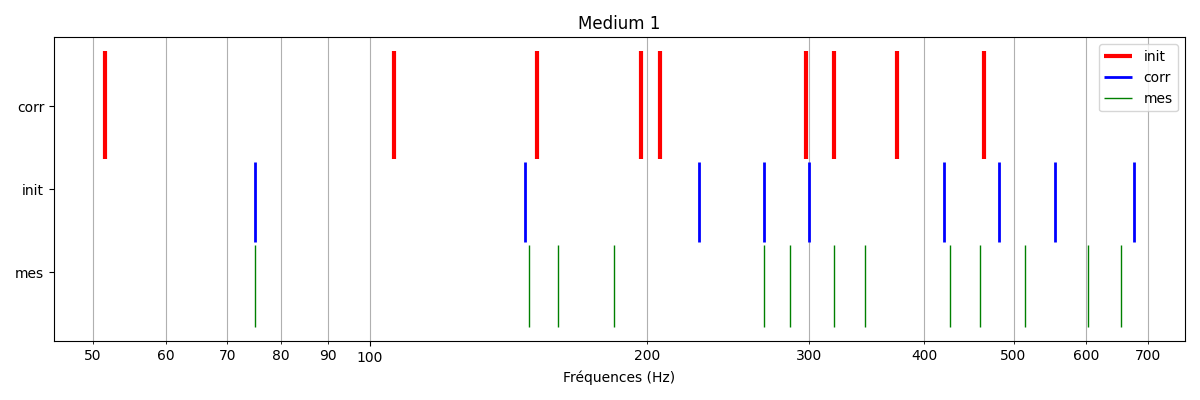

In [56]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.vlines(fn_init, 0.61,1, label="init", ls="-", alpha=1, color="r", lw=3)
ax1.vlines(fn, 0.31,0.6, label="corr", ls="-", alpha=1, color="b", lw=2)
ax1.vlines(modal_analysis_m1[ "freq"], 0,0.3,label="mes", ls="-", alpha=1, color="g", lw=1)
ax1.set_xscale('log')
ax1.grid(which="both", axis="x")
ax1.set_yticks([0.2,0.5,0.8])
ax1.set_yticklabels(["mes","init","corr"])
ax1.legend()
ax1.set_xlabel("Fréquences (Hz)")
ax1.set_ylabel("")
ax1.set_title(r"Medium 1")
ax1.set_xlim()
ax1.set_ylim()
import matplotlib.ticker as mticker
ax1.xaxis.set_minor_formatter(mticker.ScalarFormatter())
ax1.xaxis.set_major_formatter(mticker.ScalarFormatter())

fig.tight_layout()

plt.show()

In [78]:
m1_corrige = {
    "xi_mod" : np.array([-0.088747, -0.030742, -0.112417, -0.052442, -0.053975, -0.01313, -0.042184, -0.06139, -0.0375]),
    "Lx_corr" : Lx_corr,
    "Ly_corr" : Ly_corr,
    "h_corr" : h_corr,
    "Enu" : E/(1-nu_corr**2),
}
print(m1_corrige)

{'xi_mod': array([-0.088747, -0.030742, -0.112417, -0.052442, -0.053975, -0.01313 ,
       -0.042184, -0.06139 , -0.0375  ]), 'Lx_corr': 0.40204081632653066, 'Ly_corr': 0.2766326530612245, 'h_corr': 0.00395, 'Enu': 3206458380.6503973}


In [80]:
#Correction m2
Lx_init, Ly_init, h_init = 400e-3, 295e-3, 6.04e-3
rho = 507e-3/Lx_init/Ly_init/h_init
E = 2.7e9
Lx_corr, Ly_corr, h_corr, nu_corr = u.corr_dim_AS_optim(modal_analysis_m2, Lx_init, Ly_init, h_init, rho, E, delta_l=10e-2, delta_h=1e-3, Nh=3, mode_idx=0, nu_cible=0.4)
print("Correction :", Lx_init, Ly_init, h_init, "=>", Lx_corr, Ly_corr, h_corr)
print("==========================\nFréquences propres corrigées :")
fn,_ = u.compute_AS_frequencies(Lx_corr, Ly_corr, h_corr, nu_corr, E, rho)
print(fn)
import pandas as pd
pd.DataFrame(modal_analysis_m2).T

Correction : 0.4 0.295 0.00604 => 0.4959183673469388 0.23581632653061224 0.00504
Fréquences propres corrigées :
[107.10948395 166.36730815 265.13034849 369.1801116  428.4379358
 527.20097614 805.96449101 865.22231521 963.98535555]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
table,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2
freq,107.109484,163.230958,190.083095,265.824204,413.324927,429.22436,460.312744,533.201989,604.013371,695.290919,759.978194,816.237921,872.904512,909.5429,1043.627614,1094.671593
xi,-0.000471,-0.001456,-0.000493,-0.000567,-0.002309,-0.00096,-0.000979,-0.000899,-0.0014,-0.000975,-0.001144,-0.002126,-0.002223,-0.001305,-0.0017,-0.00364
ratios,1.0,1.523964,1.774662,2.481799,3.858901,4.007342,4.297591,4.978102,5.639215,6.491404,7.09534,7.620594,8.149647,8.491712,9.743559,10.220118
xi_mod,-0.112532,-0.228424,-0.066335,-0.054624,-0.143033,-0.05725,-0.05447,-0.04318,-0.059321,-0.035913,-0.038542,-0.066675,-0.065191,-0.03673,-0.041708,-0.085118


In [81]:
m2_corrige = {
    "xi_mod" : np.array([-0.112532, -0.228424	, -0.054624, -0.143033, -0.05725, -0.04318, -0.066675, -0.065191, -0.03673	]),
    "Lx_corr" : Lx_corr,
    "Ly_corr" : Ly_corr,
    "h_corr" : h_corr,
    "Enu" : E/(1-nu_corr**2),
}
print(m2_corrige)

{'xi_mod': array([-0.112532, -0.228424, -0.054624, -0.143033, -0.05725 , -0.04318 ,
       -0.066675, -0.065191, -0.03673 ]), 'Lx_corr': 0.4959183673469388, 'Ly_corr': 0.23581632653061224, 'h_corr': 0.00504, 'Enu': 3214097891.0586696}


In [82]:
rho

711.3592995846896

In [64]:
m2_corrige["Enu"], m1_corrige["Enu"], metal_corrige["Enu"], plexi_corrige["Enu"]

(3214097891.0586696, 3206458380.6503973, 83238129955.9411, 1307742955.0439968)

In [65]:
m2_corrige["h_corr"], m1_corrige["h_corr"]

(0.00504, 0.00395)

In [68]:
(1307742955.0439968-3206458380.6503973)/3206458380.6503973

-0.5921534603612305